In [1]:
import pandas as pd
import numpy as np
import json

#set printing options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df1  = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


# Quality issues

1. Missing values in retweeted status ID

2. Missing values Retweeted status user id

3. Empty/null values stored as 'none' as should be identified and replaced

4. Name of the dog and 4 different maturity stages/columns have missing values.



#Tidyness/structural Issues

1.   The timestamp needs to be seperated into a date and time column seperately.
2.   



In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [85]:
df2  = pd.read_csv('image-predictions.tsv', delimiter="\t")

df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


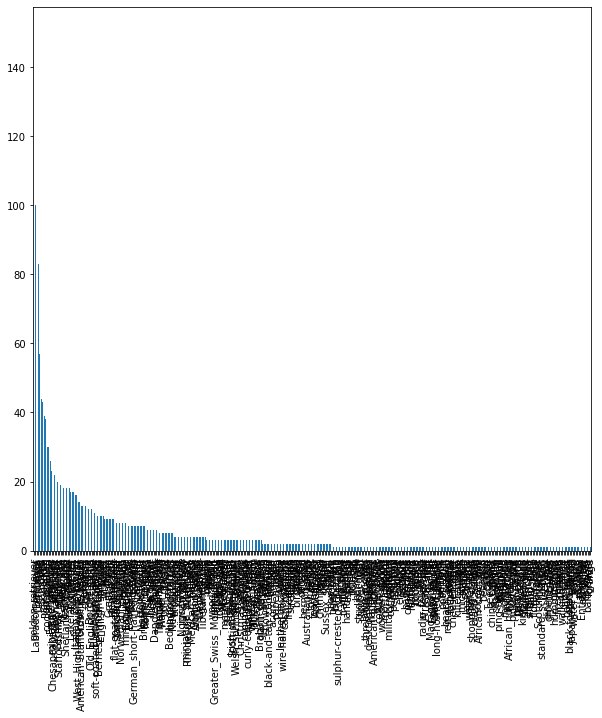

In [ ]:
df2['p1'].value_counts().plot(kind='bar', figsize=(10, 10));

In [63]:
#Reading in the Json file

df = pd.read_json('tweet.json', lines=True)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [83]:
df['user'][1113]

{'contributors_enabled': False,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'default_profile': False,
 'default_profile_image': False,
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'weratedogs.com',
     'expanded_url': 'http://weratedogs.com',
     'indices': [0, 23],
     'url': 'https://t.co/N7sNNHAEXS'}]}},
 'favourites_count': 114031,
 'follow_request_sent': False,
 'followers_count': 3200944,
 'following': True,
 'friends_count': 104,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 4196983835,
 'id_str': '4196983835',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 2803,
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'name': 'WeRateDogs™ (author)',
 'notifications': False,
 'profile_background_color': '000000',
 'profile

In [6]:
#Getting a full list off the columns
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [7]:
#dropping 'created at', 'entities', 'source', 'in_reply_to_status_id','in_reply_to_status_id_str',
#'in_reply_to_user_id', 'in_reply_to_user_id_str', 'geo', 'coordinates', 'place','contributors',
#'in_reply_to_screen_name', ''retweeted_status','quoted_status_id', 'quoted_status_id_str', 'quoted_status'
       

be_dropped = ['created at', 'entities', 'source', 'in_reply_to_status_id','in_reply_to_status_id_str',
'in_reply_to_user_id', 'in_reply_to_user_id_str', 'geo', 'coordinates', 'place','contributors',
'in_reply_to_screen_name', 'retweeted_status','quoted_status_id', 'quoted_status_id_str', 'quoted_status'
]      

column_list = ['id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'extended_entities',
        'user','is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang']

In [10]:
#dropping the selected column list above with the 90% null value query


def rmv(dff):

    for column in df.columns.values.tolist():
      missing_values = df[column].isnull().sum()        #total missing values in a column
      total_rows = len(df)                    
      pomv = (missing_values/total_rows)*100            #percentage of missing val in a col
      if pomv>95:
         del(df[column])

    return dff  

In [11]:
#creating a new data frame

ndf  = rmv(df)

In [12]:
ndf.columns.values.tolist()

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'user',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status']

In [13]:
#Checking the language column...what can we do with the lang column?
ndf['lang'].value_counts()


#1. find the lang encoding meaning for twitter as used here
#2. Question, identify and check how accurate desc, breed, name and score is for other languages
# that are not english

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [14]:
#Checking the truncted column, should we keep the 'truncated' column? what does it mean?

ndf['truncated'].value_counts()

#It has just one cat hence we set it up for removal

False    2354
Name: truncated, dtype: int64

In [ ]:
'display_text_range'

In [30]:
#The 'display_text_range' shows the length of text chars but how do you use it? e.g [0, 57]

# 'entities', 'extended_entities' and 'user' are nested hence we may need to explode them

#We drop 'source' because it doesnt seem useful but on a2nd thought, it can be useful, such that, 
#it captures the kind of phone the user used to tweet or possibly take the dog pictures hence we 
#can use it to infer pix quality and how it affects the rating/scores


#Retweeted and retweeted status are to be dropped as well. Retweet has a single cat.same with 
#and 'possibly_sensitive_appealable', 'possibly_sensitive'

In [37]:
ndf['possibly_sensitive'].value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [34]:
#columns to be dropped
drop_cols = ['truncated', 'source','retweeted', 'retweeted_status','possibly_sensitive',
             'possibly_sensitive_appealable']

In [38]:
#dropping selected columns   #add to pipeline
df2 = df.drop(['truncated', 'source','retweeted', 'retweeted_status','possibly_sensitive',
               'possibly_sensitive_appealable'], axis = 1)
df2.head()

,created_at,id,id_str,full_text,display_text_range,entities,extended_entities,user,is_quote_status,retweet_count,favorite_count,favorited,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,en


DEALING WITH NESTED COLUMN CASES(USER,ENTITIES AND EXTENDED ENTITIES) 

In [44]:
from ast import literal_eval

In [46]:
# df.user = df.user.apply(literal_eval)     #failed

In [84]:
#ndp = pd.json_normalize(df.user)                 #worked but just exploded only the first row and dupli
                                            #cated it into 2354 rows. So, we may need to find a way to
                                            #apply the iterate row/row and take only one instance to
#ndp.head()                                           #build a seperate df for each row case

In [68]:
# lln = df.join(pd.DataFrame(df.pop('user').values.tolist()))  #failed
# lln.head()

In [58]:
#nn1 = df['user'].apply(pd.Series)    #worked but just exploded only the first row and dupli
                                            #cated it into 2354 rows. So, we may need to find a way to
                                            #apply the iterate row/row and take only one instance to
                                            #build a seperate df for each row case
#nn1.head()

In [74]:
#Building a script to iterate through each row and normalize

# Creating Empty DataFrame and Storing it in variable df
dfn = pd.DataFrame()

for i in range(len(df)):
  usr = df['user'][i]
  usr_n = pd.json_normalize(usr)
  row = usr_n.loc[0, :]
  dfn = dfn.append(row, ignore_index=False)
dfn.head()

### Try building same for the 'entities' case yourself in 5mins

#Script: Cleaning and dealing with erroneous dog breeds

In [86]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Since we discovered that the most accurate confidence score for dog breeds has erroneous labelling, we would try to corret this

In [87]:
#1. check wether all instances in p1 are actual dog breeds using an external breed list
#2. if an instance is not a breed, replace that instance with p2 if p2 is a dog breed or p3 if p2
    #is not a dog breed. 
#3. if p3 is not a dog breed, replace it with Nan and fill with mode later or delete row. 

In [88]:
db = pd.read_csv('https://raw.githubusercontent.com/paiv/fci-breeds/main/fci-breeds.csv')
db.head()

,id,name,group,section,provisional,country,url,image,pdf
0,1,ENGLISH POINTER,Pointing Dogs,British and Irish Pointers and Setters,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/ENGLISH-POIN...,http://www.fci.be/Nomenclature/Illustrations/0...,http://www.fci.be/Nomenclature/Standards/001g0...
1,2,ENGLISH SETTER,Pointing Dogs,British and Irish Pointers and Setters,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/ENGLISH-SETT...,http://www.fci.be/Nomenclature/Illustrations/0...,http://www.fci.be/Nomenclature/Standards/002g0...
2,3,KERRY BLUE TERRIER,Terriers,Large and medium sized Terriers,NaN,IRELAND,http://www.fci.be/en/nomenclature/KERRY-BLUE-T...,NaN,http://www.fci.be/Nomenclature/Standards/003g0...
3,4,CAIRN TERRIER,Terriers,Small sized Terriers,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/CAIRN-TERRIE...,http://www.fci.be/Nomenclature/Illustrations/0...,http://www.fci.be/Nomenclature/Standards/004g0...
4,5,ENGLISH COCKER SPANIEL,Retrievers,Flushing Dogs,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/ENGLISH-COCK...,http://www.fci.be/Nomenclature/Illustrations/0...,http://www.fci.be/Nomenclature/Standards/005g0...


Notice that the dog breed name in db dataframe are all in capital letters and seperated by space while the ones in our original dataframe(df2) is in small letters and seperated by '_', an underscore. Hence if we trying to do a matching check, it would not work until we re-format them to be uniform. We can either reformat db to look ike df2 or vice versa

In [97]:
#Building a helper function to replace '_' with ' ' and convert all to uppercase

def refr (breed):
    
    breed = breed.replace('_', ' ')
    breed = breed.upper()
    
    return breed

In [ ]:
# #using indexing for our function
# def dogb ():

# confd = []

#   for bn in range (len(df2)):
#     brd = df2['p1'][bn]
#     brd = refr(brd)
#     if brd in db['name'].values.tolist():
#       confd.append(brd)

#     elif  brd in db['name'].values.tolist() == False and refr(df2['p2'][bn]) in db['name'].values.tolist()==True:
#       brd = refr(df2['p2'][bn])
#       confd.append(brd)

#     elif brd in db['name'].values.tolist() == False and refr(df2['p2'][bn]) in db['name'].values.tolist()==False and refr(df2['p3'][bn]) in db['name'].values.tolist()==True:
#       confd.append(refr(df2['p3'][bn]))
#     else:
#       brd = 'nan'
#       confd.append(brd)




In [100]:
confd = []

for bn in range (len(df2)):
    brd = df2['p1'][bn]
    brd = refr(brd)
    if brd in db['name'].values.tolist():
      confd.append(brd)

    elif  brd in db['name'].values.tolist() == False and refr(df2['p2'][bn]) in db['name'].values.tolist()==True:
      brd = refr(df2['p2'][bn])
      confd.append(brd)

    elif brd in db['name'].values.tolist() == False and refr(df2['p2'][bn]) in db['name'].values.tolist()==False and refr(df2['p3'][bn]) in db['name'].values.tolist()==True:
      confd.append(refr(df2['p3'][bn]))
    else:
      brd = 'nan'
      confd.append(brd)

In [103]:
len(confd), df2.shape

(2075, (2075, 12))

In [104]:
df2['p1'] = confd

df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH SPRINGER SPANIEL,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,nan,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,nan,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RHODESIAN RIDGEBACK,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MINIATURE PINSCHER,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [105]:
df2  = pd.read_csv('image-predictions.tsv', delimiter="\t")

df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [106]:
len(db)   ##search the github archive to find out why redbone and german sheperd were excluded

354